# Evolutionary Computing - N-Queens Problem


**Goal**: Implement an Evolutionary Algorithm to solve for the N-Queens problem. Could be defined as minimization of maximization.

This assignment requires implementation of the main components of an evolutionary algorithm (i.e. *crossover*, *mutation*, *parent selection*, etc), and construction of your algorithm to solve the given problem. Try to make your EA as good performing as possible (solving also the bigger chess boards).

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

POINTS ARE ONLY FOR RELATIVE FEEDBACK, NOT AN ACTUAL GRADE.

**Setup**

**Install Prerequisites**

In [ ]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy

**Imports**

In [33]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums
import random

# Set seed
np.random.seed(42)

**Plotting**

In [178]:
# Enables inline matplotib graphs
# %matplotlib inline
%pip install PyQt5
# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
#%matplotlib qt5
#%pip install PyQt5
#plt.ion()


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [181]:
def generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2,
    stds_experiment_2,
    n_columns,
    n_queens,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(18, 6))

    for i in range(len(avgs_experiment_1)):
        if avgs_experiment_2 is not None:
            # Plot data for subplot 1
            axes[i].plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            axes[i].fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
            axes[i].set_ylim(bottom=0)

            if n_queens:
                axes[i].set_ylim(top=n_queens[i])

        axes[i].plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        axes[i].fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        axes[i].set_title(labels[i])
        axes[i].set_ylim(bottom=0)
        if n_queens:
            axes[i].set_ylim(top=n_queens[i])

    # Set common labels and title
    for ax in axes:
        ax.set_xlabel("Generations")
        ax.set_ylabel("Average Best Fitness")
        ax.legend()

    plt.tight_layout()

---

## Discrete Optimization - The N-Queens Problem (5 points total)

Implement an Evolutionary Algorithm for the **n-queens problem** - finding a placement of N queens on an N by N chess board, in which no queens are attacking each other.

Below is a visualization of a solution for the n-queens problem when n = 4. Observe that none of the queens are attacking each other.

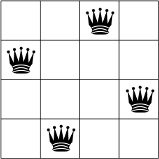


We would like to implement an EA that can find a solution for any given N by N board, by placing N queens where none of them attack each other.
It is usually better to start simple and generalize your implementation. So, let's start with the case when **N = 4**.

### **Question 1 (0-0.3 pt):**
* How do you represent a solution (a 4 queen placement on a 4x4 chess board)? In particular, specify the length of your genotype representation, what each gene (dimension) represents, and what values they can get.

**Answer:** A solution is represented as a list of length n (4), where the index of each element represents the row and the value represents the column

### **Question 2 (0-0.2 pt):**
* Please write down an example representation and discuss what it means.

**Answer:** [2, 0, 3, 1] This would rpresent the queens in positions like the example image above. 2 on index 0 means row 0 (left) at the second column third position, because we use 0 as starting index.


### **Question 3 (0-0.2 pt):** 
* How many possible solutions can be generated in your representation?

**Answer:** In the case of n=4 the amount of possible solutions is 4! = 24 . In any case it would be n!

---

### **Task 1 (0-0.20-0.40-0.80):** 
Implementation of solution encoding, visualization and evaluation functions.

In [74]:
################################################################


# PLEASE FILL IN - how do you represent your solution?
example_solution = [2,0,3,1]


################################################################

Write a function below that can visualize your solution. For instance, the output may look like below, a matrix representing the 4x4 chess board where each Q indicates a queen placement and dots are empty cells. <br>
<br>
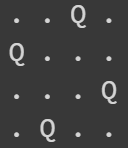


In [75]:
def visualize_solution(solution):
    """Visualize the placement of queens on the chessboard."""
    n = len(solution)
    for i in range(n):
        e = '. '
        row_str = e * (solution[i]) + 'Q ' + e * ((n-1) - solution[i])
        print(row_str)
        
visualize_solution(example_solution)

. . Q . 
Q . . . 
. . . Q 
. Q . . 


Write the evaluation function to assess how good your solution is.

In [156]:
def evaluate_solution_n_queens(solution):
    """Calculate the fitness of an solution.
       Sum up the amount of queens that are attacking eachother.
    """
    # No horizontal attacking possible because of index
    # Diagonals share on the main row-col value and anti diagonal row + col 
    # so if a diag row cool is already in the set its attacking another queen this is done in O(n) time
    
    main_diags, anti_diags, verticals = set(), set(), set()
    fitness = 0
    
    for row, col in enumerate(solution):
       if row - col in main_diags:
          fitness += 1
       if row + col in anti_diags:
          fitness += 1
       if col in verticals:
          fitness += 1
      
       
       main_diags.add(row - col)
       anti_diags.add(row + col)       
       verticals.add(col)

    return fitness

Try your implementations to see if your solution encoding matches to visualization and whether the fitness is computed correctly.

In [153]:
#################################
# Grading
# 0 pts: No attempt, representation discussed does not match with the implementation and visualization, fitness is not correct.
# 0.20 : Solution representation matches with visualization, fitness computation is not correct, no explanation in the code.
# 0.50 : Solution representation matches with visualization, fitness computation is correct, no explanation in the code.
# 0.80 : Solution representation matches with visualization, fitness computation is correct, the implementation explained well.
################################################################


###################### DO NOT CHANGE #########################
print("Genotype (solution representation):", example_solution)
print("Phenotype (solution visualization):")
visualize_solution(example_solution)
print("Solution fitness", evaluate_solution_n_queens(example_solution))
###################### DO NOT CHANGE #########################

Genotype (solution representation): [2, 0, 3, 1]
Phenotype (solution visualization):
. . Q . 
Q . . . 
. . . Q 
. Q . . 
Solution fitness 0


---



### **Task 2 (0-0.4-0.8-1.2-1.6 pt):** 
Write an evolutionary algorithm that can initialize a population of solutions and finds N queen placement to NxN board optimizing the number of attacks (could be minimization or maximization based on your evaluation function of the solutions).

In [415]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.4 pts if the code works but some functions are incorrect and it is badly explained
# 0.8 pts if the code works but some functions are incorrect but it is explained well
# 1.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 1.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


def initialization_n_queens(population_size, num_of_dims):
    """Generate a population of solutions."""
    possible_positions = range(num_of_dims)
    x = [random.sample(possible_positions, num_of_dims) for _ in range(population_size)] 

    return x


def evaluation_n_queens(x):
    """Evaluate the whole population and return the fitness of each."""
    return [evaluate_solution_n_queens(solution) for solution in x]


def crossover_n_queens(x_parents, p_crossover):
    """Perform crossover to create offsprings."""
    offspring = []
    n = len(x_parents[0])
        
    for i in range(1, len(x_parents), 2):
        if random.random() < p_crossover:
            p1 = x_parents[i]
            p2 = x_parents[i-1]
            
            cp1, cp2 = random.randint(0, n), random.randint(0, n)
            if cp1 > cp2:
                cp1, cp2 = cp2, cp1
            
            p1_slice = p1[cp1:cp2]
            not_in_p1_slice = [item for item in p2 if item not in p1_slice]
            child1 = not_in_p1_slice[:cp1] + p1_slice + not_in_p1_slice[cp1:]
            
            p2_slice = p2[cp1:cp2]
            not_in_p2_slice = [item for item in p1 if item not in p2_slice]
            child2 = not_in_p2_slice[:cp1] + p2_slice + not_in_p2_slice[cp1:]
            
        else:
            child1 = x_parents[i][:]
            child2 = x_parents[i-1][:]
            
        offspring.append(child1)
        offspring.append(child2)

    return offspring # size will be 2x population size


def mutation_n_queens(x, mutation_rate):
    """Apply mutation to an individual."""
    for q in x:
        if random.random() < mutation_rate:
            s1, s2 = random.sample(q, 2)
            q[s1], q[s2] = q[s2], q[s1]

    return x


def parent_selection_n_queens(x, f):
    """Select parents for the next generation. Returns a list of parents and a list of their fitness values."""
    # Using tournament selection, random sample group where elites are selected from
    tournament_size = 5
    selected_x, selected_f = [], []
    
    for _ in range(len(x)):
        tournament = random.sample(list(zip(x, f)), tournament_size)
        winner = min(tournament, key=lambda x: x[1])
        selected_x.append(winner[0])
        selected_f.append(winner[1])
        
    return selected_x, selected_f


def survivor_selection_n_queens(x, f, x_offspring, f_offspring):
    pop_size = len(x) # original population size
    elite_size = 10
    parents_pair = list(zip(x, f))

    # take elite_size best from parents (elitism) the rest from offspring
    parents_pair.sort(key=lambda y: y[1]) # lower fitness is better
    elites_x, elites_f = zip(*parents_pair[:elite_size])
    
    offspring_survivors = list(zip(x_offspring, f_offspring))
    offspring_survivors = random.sample(offspring_survivors, pop_size - elite_size)
    off_x, off_f = zip(*offspring_survivors)
    
    return list(elites_x) + list(off_x), list(elites_f) + list(off_f)


def ea_n_queens(population_size, max_fit_evals, p_crossover, m_rate, num_of_dims):
    # Calculate the maximum number of generations
    max_generations = int(max_fit_evals / population_size)

    # Initialize population and calculate fitness
    x = initialization_n_queens(population_size, num_of_dims)
    f = evaluation_n_queens(x)

    # Get best individual and append to list
    idx = np.argmin(f)
    x0_best = x[idx]
    f0_best = f[idx]
    x_best = [x0_best]
    f_best = [f0_best]

    # Loop over the generations
    for _ in range(max_generations - 1):
        # Select population size parents
        x_parents, f_parents = parent_selection_n_queens(x, f)
        x_offspring = crossover_n_queens(x_parents, p_crossover)
        x_offspring = mutation_n_queens(x_offspring, m_rate)
        f_offspring = evaluation_n_queens(x_offspring)
        x, f = survivor_selection_n_queens(
            x_parents, f_parents, x_offspring, f_offspring
        )

        # Find the best individual in current generation and add to the list
        idx = np.argmin(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best < f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

    return x_best, f_best

---
**Results:**

Run the code below to run an EA for N=8, 16 and 32, and visualize the best solutions found.
Note, it is not allowed to change the hyper parameters


In [419]:
print("Case when N=8:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 8)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=8:
Best fitness: 0
Best solution found:
. . . Q . . . . 
. . . . . Q . . 
. . . . . . . Q 
. . Q . . . . . 
Q . . . . . . . 
. . . . . . Q . 
. . . . Q . . . 
. Q . . . . . . 


In [424]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=16:
Best fitness: 0
Best solution found:
. . . . . . . . . . . . Q . . . 
Q . . . . . . . . . . . . . . . 
. . . Q . . . . . . . . . . . . 
. . . . . . . . . . . Q . . . . 
. . . . . . . . . Q . . . . . . 
. Q . . . . . . . . . . . . . . 
. . . . Q . . . . . . . . . . . 
. . . . . . . . . . Q . . . . . 
. . . . . . . . . . . . . . . Q 
. . . . . . . . . . . . . Q . . 
. . . . . Q . . . . . . . . . . 
. . . . . . . . Q . . . . . . . 
. . . . . . . . . . . . . . Q . 
. . . . . . . Q . . . . . . . . 
. . Q . . . . . . . . . . . . . 
. . . . . . Q . . . . . . . . . 


In [427]:
print("Case when N=32:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 32)

print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=32:
Best fitness: 0
Best solution found:
. . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . 
. . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . 
. . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . 
. . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . 
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . 
. . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . 
. . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . 
. . . . . . . . . . . . Q . . . . . .

---

### Plotting the average performance of the algorithm
Use the cells below to plot the results of your algorithm. The plots should show average and std of 10 runs of EA for n-queens problem for N=8, 16, 32.

In [172]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    f_best = np.array(f_best)
    avg = np.mean(f_best, axis=0)
    std = np.std(f_best, axis=0)
    return avg, std

In [173]:
def run_experiment_n_queens(population_size, p_crossover, m_rate):

    # These are the hyperparameters of your evolutionary algorithm. You are not allowed to change them.
    runs = 10
    max_fit_evals = 10000


    fitness_8 = []
    fitness_16 = []
    fitness_32 = []



    for run in range(runs):
        print("Run: ", run)

        _, f_best_8 = ea_n_queens(
            population_size[0], max_fit_evals, p_crossover[0], m_rate[0], num_of_dims=8
        )
        _, f_best_16 = ea_n_queens(
            population_size[1], max_fit_evals, p_crossover[1], m_rate[1], num_of_dims=16
        )
        _, f_best_32 = ea_n_queens(
            population_size[2], max_fit_evals, p_crossover[2], m_rate[2], num_of_dims=32
        )
        fitness_8.append(f_best_8)
        fitness_16.append(f_best_16)
        fitness_32.append(f_best_32)

    avg_8, std_8 = calculate_mean_std(fitness_8)
    avg_16, std_16 = calculate_mean_std(fitness_16)
    avg_32, std_32 = calculate_mean_std(fitness_32)

    avgs = [avg_8, avg_16, avg_32]
    stds = [std_8, std_16, std_32]
    all_runs = [fitness_8, fitness_16, fitness_32]

    return avgs, stds, all_runs

In [395]:
population_size = [100, 100, 100]  # not allowed to change
p_crossover = [0.8, 0.8, 0.8]  # not allowed to change
m_rate = [0.1, 0.1, 0.1]  # not allowed to change

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment_n_queens(
    population_size, p_crossover, m_rate
)

Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Run:  5
Run:  6
Run:  7
Run:  8
Run:  9


In [396]:
#check for the best fitness found for each problem

f_8, f_16, f_32 = all_runs_experiment_1

print("Best fitness found for N = 8: ", max(max(f_8)))
print("Best fitness found for N = 16: ", max(max(f_16)))
print("Best fitness found for N = 32: ", max(max(f_32)))

Best fitness found for N = 8:  2
Best fitness found for N = 16:  5
Best fitness found for N = 32:  13


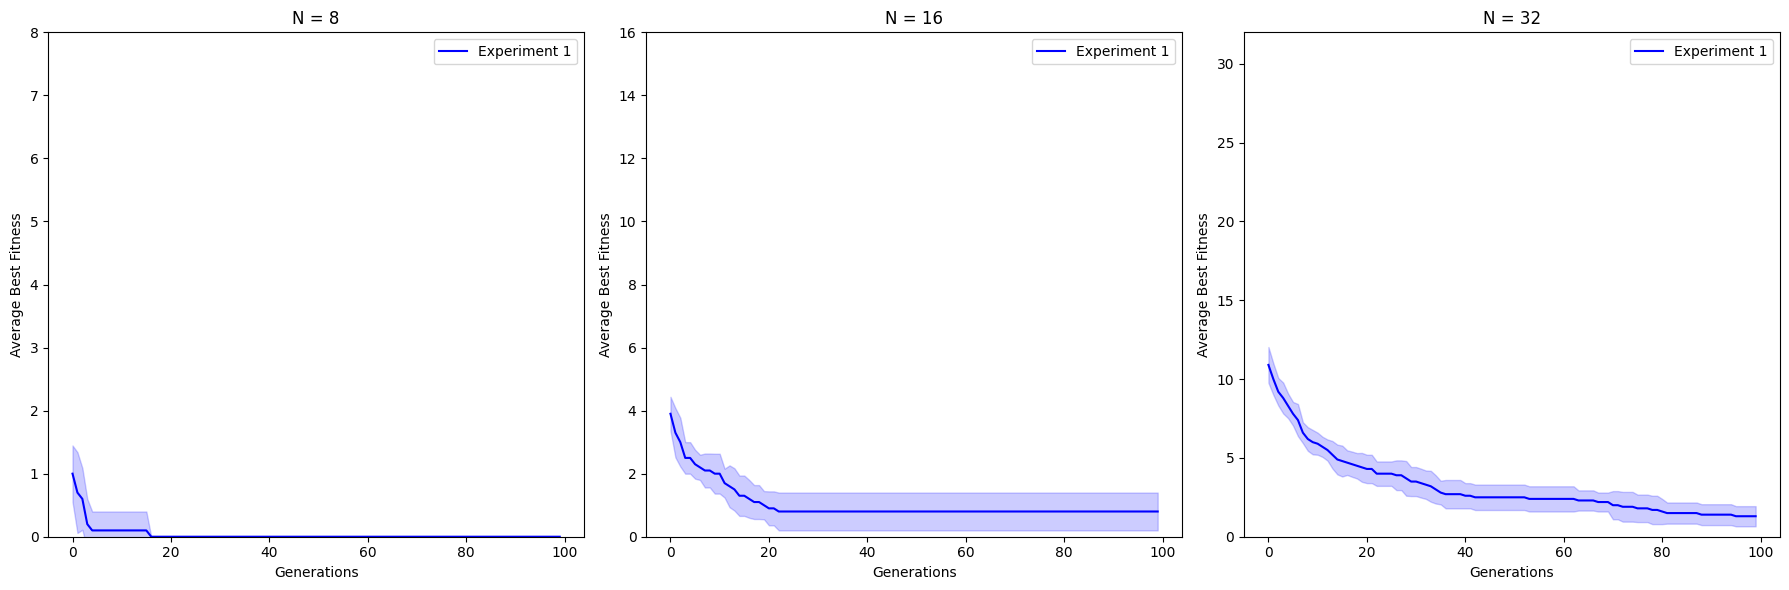

In [397]:
labels = ["N = 8", "N = 16", "N = 32"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=[8, 16, 32],
)

### **Question 4 (0-0.4 pt):** 
* Describe the average performance of the algorithm. What was the maximum average fitness found for each case? Do you see any differences between the problem cases?

**Answer**: The performance of the algorithm decreases when n grows as expected because of the complexity. Especially in the first couple of generations the average best fitness is scaling upwards with n. Slowly all three come down to zero or 1.

